Two most popular areas in Machine Learning are Supervised Learnind & Unsupervised Learning. From solutions perspective the two areas are quite similar, as they basically give a single output given some data. But not all problems are closely circuited and can be quite complex. Lot of solutions are also deployed where complex problems are broken down to ML Pipelines, where different teams may be deployed to each component. The pipeline components are therefore generally independent of each other. Here we introduce Reinforcement Learning, which in simpler words can be explained as Machine Learning Pipeline built using Machine Learning.   

Reinforcement Learning is an emerging Machine Learning Area, where by we identify incremental 
decisions that may finally lead us to a success critria. This kind of application is most easily understood
in the gaming arena. Some interesting games being studied in this area are:
1. Go: https://deepmind.com/research/case-studies/alphago-the-story-so-far
2. Chess: https://github.com/Zeta36/chess-alpha-zero
3. Tic Tac Toe: https://github.com/DanielSlater/AlphaToe
4. Mario: https://www.cse.iitb.ac.in/~nilesh/media/Mario_Neat.pdf
and many more. 

The gaming industry is not the only one with reinforcement learning usecases, but all feilds with strategic intelligence requirements expected to be greatly influenced by it. Be it Stock Trading, Autonomous Driving or maybe Robotic Surgeries (some day). If machines can become good at strategizing it really makes the jobs of many white collar executives obsolete.  

Another way far-fetched yet interesting application of reinforcement learning can be to to create alter-images for people like one described here: https://superman.fandom.com/wiki/Jor-El_A.I.

Now this is a pretty introductory session and my goal is to introduce a very simple and powerful reinforcement learning algorithm - Q Learning. Let us try to learn a model that can come out of a simple maze. Here is the simple maze and a graph based representation of the same maze: 

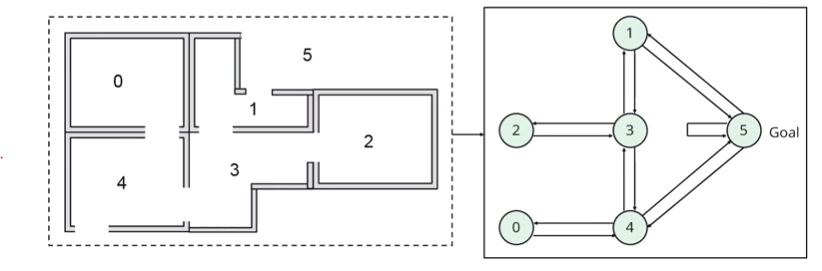

Q Learning algorithm depends on 2 matrices R & Q. 
R matrix is a square matrix with dimension = no. of possible states. 
Here the rewards is mentioned of traversing from state i to j in cell(i,j). 
The reward is set as -1 if the traversal is invalid (no Path). And it is set
to a high value (100) if the end goal is acheived with a traversal. All 
other traversals are set to 0. 

Q matrix is a square matrix with dimension = no. of possible states
Here the incremental value of taking an action (i to j) is stored. This matrix 
is initially all zero and is filled based on the experience of agent by taking
different paths.

Gamma is a learning parameter that defines the explorative vs exploitative nature 
of the agent. A high gamma means agent gives more weightage to already learned 
Q matrix values (known path / incremental reward), while low value means more 
weightage to exploring new paths.  
